In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [2]:
df_nasabah = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data\data_nasabah.csv")
df_nasabah.head(5)

,Unnamed: 0,debtor_name,debtor_nik,debtor_address,debtor_number,debtor_company,debtor_gender,debtor_education_level,employment_type,number_of_dependents,...,arrears12,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,0,Cemplunk Zulaika,4133431716345918,"Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",+62 (102) 776 3467,CV Nugroho Melani (Persero) Tbk,perempuan,D3,Retired,3,...,0,DPK,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,21
1,1,"Clara Padmasari, M.Pd",7873621118387801,"Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",+62 (808) 299 5117,UD Hidayat,laki-laki,D3,Full-time,3,...,0,DPK,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,18
2,2,"Puti Cinthia Oktaviani, S.IP",9937369990430445,"Jl. Wonoayu No. 68\nSemarang, Riau 98101",+62 (0582) 416 0892,UD Simanjuntak Padmasari (Persero) Tbk,laki-laki,D2,Full-time,4,...,0,Lancar,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,17
3,3,"Lalita Astuti, M.TI.",2071079715934185,"Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",+62 (737) 295-9765,Perum Handayani Najmudin Tbk,laki-laki,D2,Retired,3,...,0,DPK,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,17
4,4,Daliman Kusumo,8852740896362143,"Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",+62 (0740) 390 0826,PD Hardiansyah (Persero) Tbk,laki-laki,SMA,Contract,5,...,0,DPK,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,15


In [3]:
df_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   debtor_name             5000 non-null   object 
 2   debtor_nik              5000 non-null   int64  
 3   debtor_address          5000 non-null   object 
 4   debtor_number           5000 non-null   object 
 5   debtor_company          5000 non-null   object 
 6   debtor_gender           5000 non-null   object 
 7   debtor_education_level  5000 non-null   object 
 8   employment_type         5000 non-null   object 
 9   number_of_dependents    5000 non-null   int64  
 10  net_income              5000 non-null   float64
 11  payment_date            5000 non-null   object 
 12  loan_amount             5000 non-null   float64
 13  amount_of_late          5000 non-null   int64  
 14  late_payment_amount     5000 non-null   

In [4]:
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "object":
        df_nasabah[i] = df_nasabah[i].astype("category")

In [5]:
df_nasabah.head(5)

,Unnamed: 0,debtor_name,debtor_nik,debtor_address,debtor_number,debtor_company,debtor_gender,debtor_education_level,employment_type,number_of_dependents,...,arrears12,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,0,Cemplunk Zulaika,4133431716345918,"Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",+62 (102) 776 3467,CV Nugroho Melani (Persero) Tbk,perempuan,D3,Retired,3,...,0,DPK,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,21
1,1,"Clara Padmasari, M.Pd",7873621118387801,"Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",+62 (808) 299 5117,UD Hidayat,laki-laki,D3,Full-time,3,...,0,DPK,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,18
2,2,"Puti Cinthia Oktaviani, S.IP",9937369990430445,"Jl. Wonoayu No. 68\nSemarang, Riau 98101",+62 (0582) 416 0892,UD Simanjuntak Padmasari (Persero) Tbk,laki-laki,D2,Full-time,4,...,0,Lancar,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,17
3,3,"Lalita Astuti, M.TI.",2071079715934185,"Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",+62 (737) 295-9765,Perum Handayani Najmudin Tbk,laki-laki,D2,Retired,3,...,0,DPK,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,17
4,4,Daliman Kusumo,8852740896362143,"Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",+62 (0740) 390 0826,PD Hardiansyah (Persero) Tbk,laki-laki,SMA,Contract,5,...,0,DPK,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,15


In [6]:
df_nasabah.isnull().sum()

Unnamed: 0                0
debtor_name               0
debtor_nik                0
debtor_address            0
debtor_number             0
debtor_company            0
debtor_gender             0
debtor_education_level    0
employment_type           0
number_of_dependents      0
net_income                0
payment_date              0
loan_amount               0
amount_of_late            0
late_payment_amount       0
credit_risk               0
credit_score              0
arrears_amounts           0
aset                      0
loss_reverse              0
bil1_late1                0
bill_late2                0
bill_late3                0
bill_late4                0
bill_late5                0
bill_late6                0
bill_late7                0
bill_late8                0
bill_late9                0
bill_late10               0
bill_late11               0
bill_late12               0
arrears1                  0
arrears2                  0
arrears3                  0
arrears4            

In [7]:
df_nasabah.dropna(inplace=True)

In [8]:
df_nasabah.duplicated().sum()

0

In [9]:
df_nasabah.describe(include="number")

,Unnamed: 0,debtor_nik,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,...,arrears8,arrears9,arrears10,arrears11,arrears12,debtor_zip,debtor_rt,debtor_rw,debtor_age,tenor
count,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2499.500000,5.524571e+15,3.086000,1.598885e+07,6.559770e+07,69.656600,4.494400,335.858000,1.303800,9.009500e+06,...,0.271400,0.252000,0.259600,0.274800,0.263800,50191.166600,10.66060,10.575400,43.127400,12.110800
std,1443.520003,2.591200e+15,1.340509,5.932670e+06,2.405757e+07,47.851364,2.839785,154.574048,0.936419,5.398332e+06,...,0.640487,0.592762,0.599566,0.630686,0.629197,28833.170041,5.75288,5.811185,11.795279,7.595266
min,0.000000,1.001567e+15,0.000000,2.000000e+05,1.250000e+07,0.000000,0.000000,0.000000,0.000000,5.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.00000,1.000000,23.000000,1.000000
25%,1249.750000,3.288243e+15,2.000000,1.150000e+07,5.633333e+07,30.000000,2.000000,223.000000,1.000000,5.500000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,24582.750000,6.00000,6.000000,33.000000,6.000000
50%,2499.500000,5.584596e+15,3.000000,1.550000e+07,6.050000e+07,62.000000,4.000000,322.000000,1.000000,8.000000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,51219.000000,11.00000,11.000000,43.000000,11.000000
75%,3749.250000,7.784302e+15,4.000000,1.900000e+07,6.683333e+07,105.000000,7.000000,442.000000,2.000000,1.050000e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,74775.250000,16.00000,16.000000,53.000000,17.000000
max,4999.000000,9.999256e+15,7.000000,3.600000e+07,1.716667e+08,246.000000,12.000000,901.000000,8.000000,1.700000e+08,...,8.000000,5.000000,5.000000,5.000000,6.000000,99979.000000,20.00000,20.000000,63.000000,35.000000


In [10]:
# Drop unnamed column
df_nasabah.drop(["Unnamed: 0",
                 "bil1_late1", "bill_late2", "bill_late3", "bill_late4", "bill_late5", "bill_late6",
                 "bill_late7", "bill_late8", "bill_late9", "bill_late10", "bill_late11", "bill_late12",
                 "arrears1", "arrears2", "arrears3", "arrears4", "arrears5", "arrears6", "arrears7",
                 "arrears8", "arrears9", "arrears10", "arrears11", "arrears12"], axis=1, inplace=True)

In [11]:
df_nasabah.shape

(5000, 28)

In [12]:
df_nasabah.describe(exclude=["number", "datetime"]).T

,count,unique,top,freq
debtor_name,5000,5000,Abyasa Haryanti,1
debtor_address,5000,5000,"Gang Abdul Muis No. 2\nMagelang, AC 07386",1
debtor_number,5000,5000,+62 (00) 086 3002,1
debtor_company,5000,4085,UD Siregar,8
debtor_gender,5000,2,laki-laki,2530
debtor_education_level,5000,9,S1,1214
employment_type,5000,7,Retired,2435
payment_date,5000,265,2023-03-14,29
credit_risk,5000,2,Tidak tertagih,2775
aging,5000,5,DPK,3155


In [13]:
# Drop address, no_telp, name, email, and job

df_nasabah.drop(labels=["debtor_nik", "debtor_name", "debtor_address", "debtor_number", "debtor_company"], axis=1, inplace=True)

In [14]:
df_nasabah.head(5)

,debtor_gender,debtor_education_level,employment_type,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,credit_risk,...,loss_reverse,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,perempuan,D3,Retired,3,15500000.0,2023-04-18,6.250000e+07,2,1,Tertagih,...,0.000000e+00,DPK,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,21
1,laki-laki,D3,Full-time,3,17500000.0,2023-08-26,7.083333e+07,31,3,Tertagih,...,1.770833e+07,DPK,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,18
2,laki-laki,D2,Full-time,4,17500000.0,2023-08-03,5.933333e+07,0,0,Tertagih,...,0.000000e+00,Lancar,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,17
3,laki-laki,D2,Retired,3,15500000.0,2023-07-02,6.116667e+07,64,5,Tertagih,...,1.529167e+07,DPK,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,17
4,laki-laki,SMA,Contract,5,8700000.0,2023-09-10,5.616667e+07,14,2,Tertagih,...,0.000000e+00,DPK,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,15


In [15]:
df_nasabah.shape

(5000, 23)

In [16]:

category = df_nasabah.describe(exclude=["number", "datetime"]).T
category["dtypes"] = df_nasabah.dtypes
category

,count,unique,top,freq,dtypes
debtor_gender,5000,2,laki-laki,2530,category
debtor_education_level,5000,9,S1,1214,category
employment_type,5000,7,Retired,2435,category
payment_date,5000,265,2023-03-14,29,category
credit_risk,5000,2,Tidak tertagih,2775,category
aging,5000,5,DPK,3155,category
debtor_birth_place,5000,4968,"Bali, 04-11-1995",2,category
debtor_occupation,5000,5,Pengusaha,1040,category
debtor_marital_status,5000,4,Cerai hidup,1288,category


In [17]:
# Scaling category variable
columns = {}
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df_nasabah[i])
        df_nasabah[i] = columns[i].transform(df_nasabah[i])
df_nasabah.head(5)

,debtor_gender,debtor_education_level,employment_type,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,credit_risk,...,loss_reverse,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,1,2,5,3,15500000.0,107,6.250000e+07,2,1,0,...,0.000000e+00,0,12188,6,10,549,26,3,3,21
1,0,2,1,3,17500000.0,237,7.083333e+07,31,3,0,...,1.770833e+07,0,56126,20,20,1448,59,3,3,18
2,0,1,1,4,17500000.0,214,5.933333e+07,0,0,0,...,0.000000e+00,3,98101,2,15,1392,42,0,2,17
3,0,1,5,3,15500000.0,182,6.116667e+07,64,5,0,...,1.529167e+07,0,76993,19,16,68,36,3,3,17
4,0,7,0,5,8700000.0,252,5.616667e+07,14,2,0,...,0.000000e+00,0,6297,1,1,908,25,2,1,15


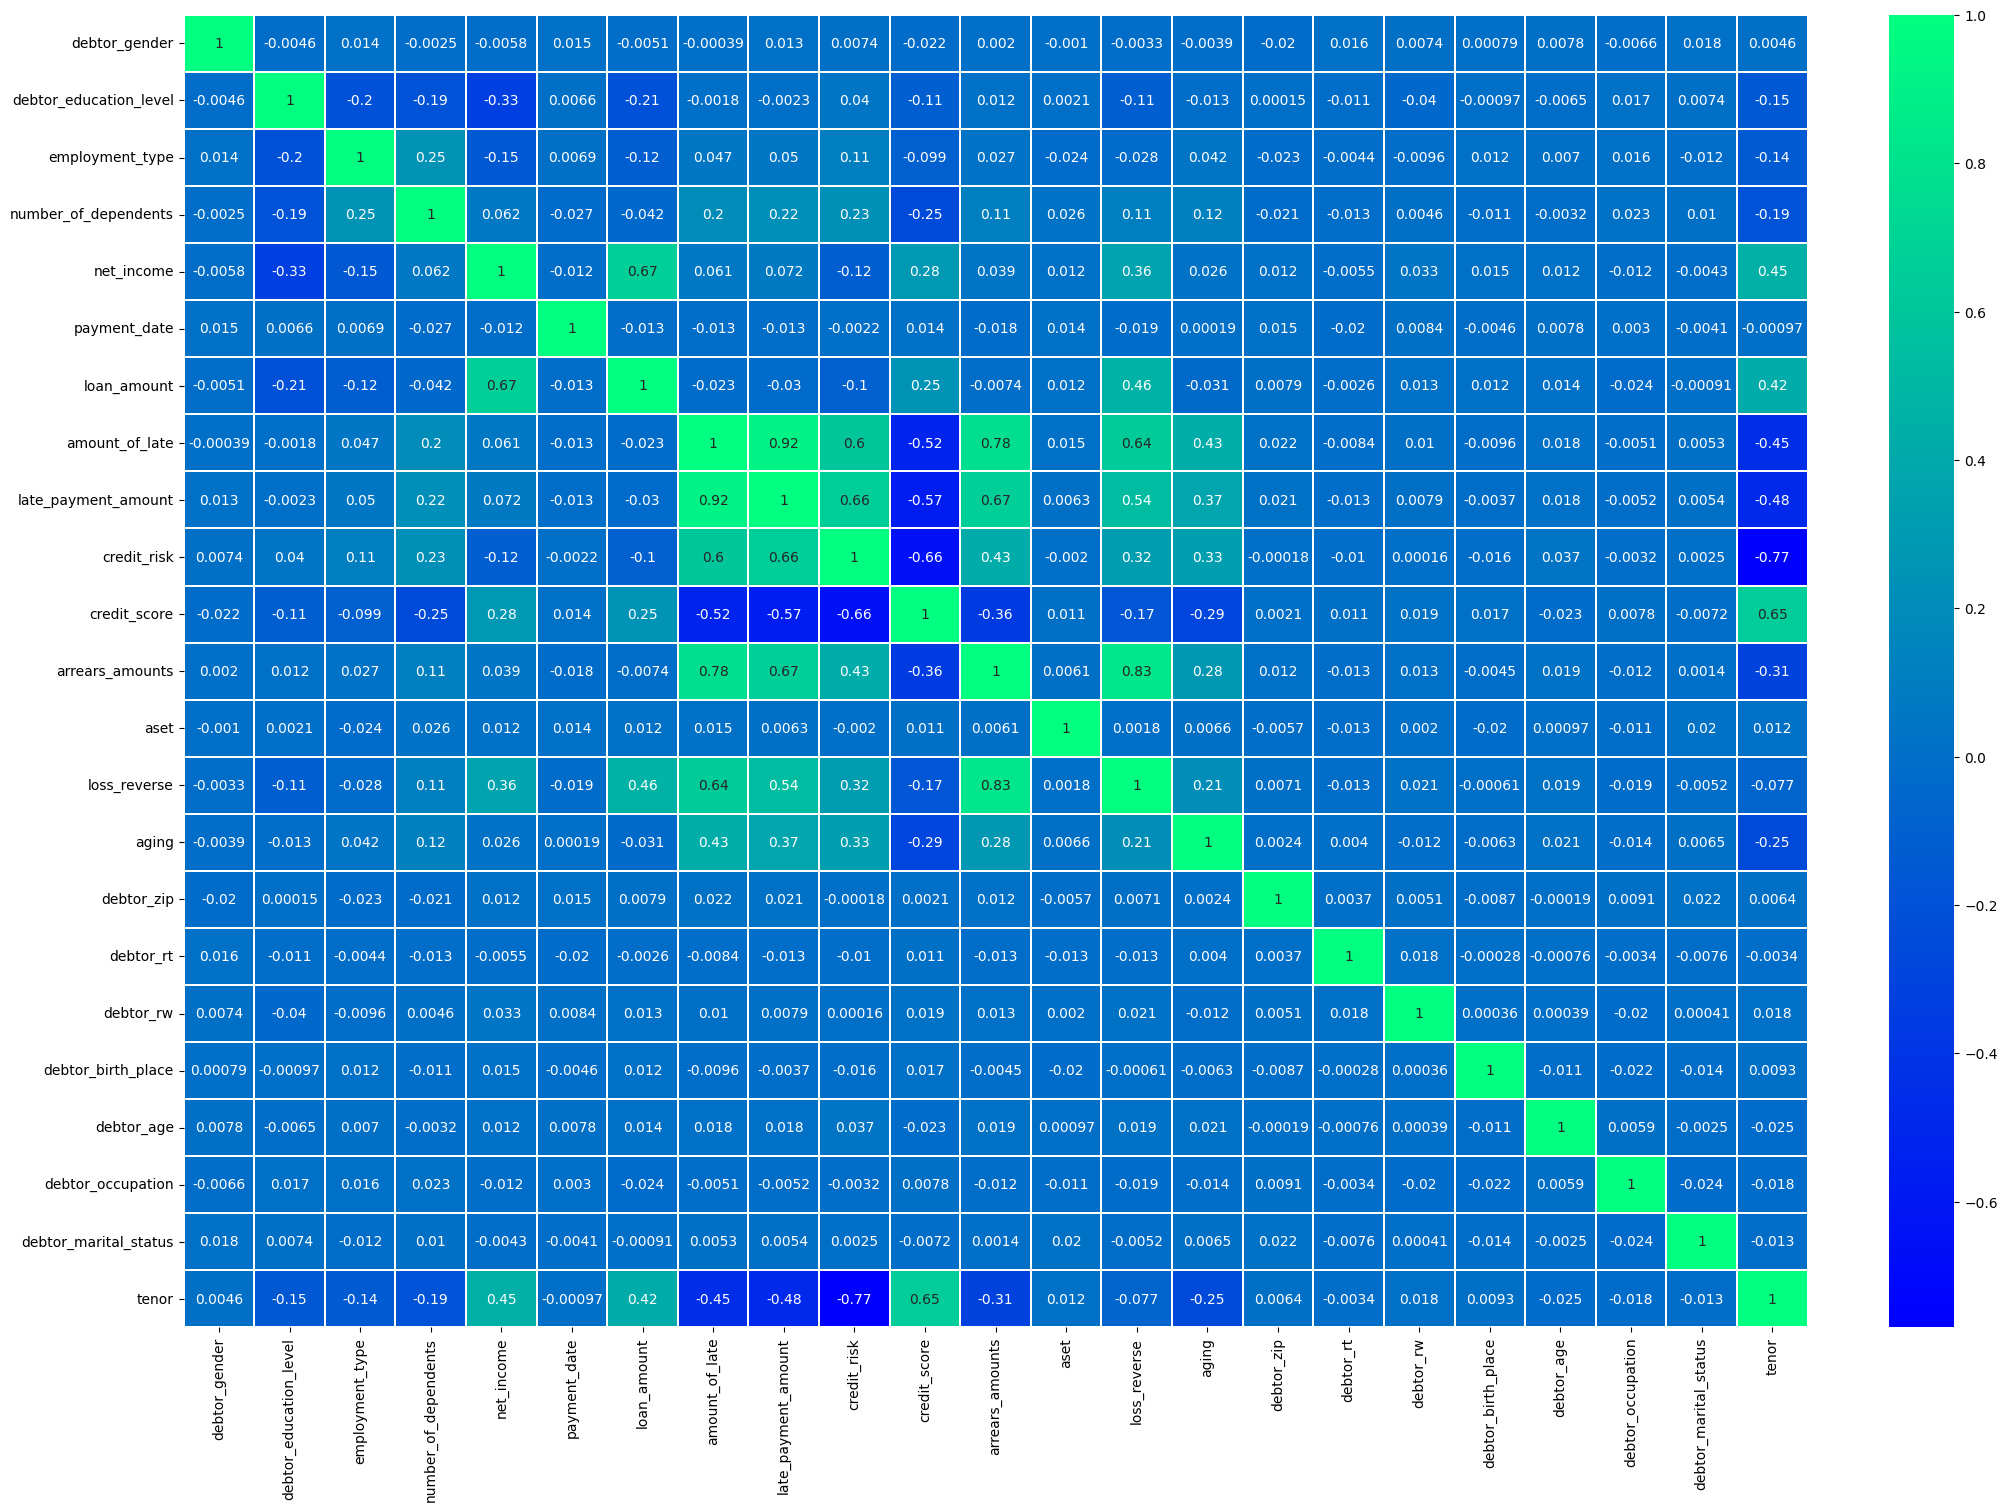

In [18]:
fig, ax = plt.subplots(figsize=(20, 15), layout="constrained")
sns.heatmap(data=df_nasabah.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)
plt.show()

In [19]:
for i in columns:
    df_nasabah[i] = columns[i].inverse_transform(df_nasabah[i])

df_nasabah.head(5)

,debtor_gender,debtor_education_level,employment_type,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,credit_risk,...,loss_reverse,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,perempuan,D3,Retired,3,15500000.0,2023-04-18,6.250000e+07,2,1,Tertagih,...,0.000000e+00,DPK,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,21
1,laki-laki,D3,Full-time,3,17500000.0,2023-08-26,7.083333e+07,31,3,Tertagih,...,1.770833e+07,DPK,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,18
2,laki-laki,D2,Full-time,4,17500000.0,2023-08-03,5.933333e+07,0,0,Tertagih,...,0.000000e+00,Lancar,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,17
3,laki-laki,D2,Retired,3,15500000.0,2023-07-02,6.116667e+07,64,5,Tertagih,...,1.529167e+07,DPK,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,17
4,laki-laki,SMA,Contract,5,8700000.0,2023-09-10,5.616667e+07,14,2,Tertagih,...,0.000000e+00,DPK,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,15


In [20]:
df_nasabah.to_csv("nasabah_clean.csv")